In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/Training_set.csv
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/Testing_set.csv
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_4378.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_747.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_561.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_345.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_3019.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_2566.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_3156.jpg
/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_3889.jpg
/kaggle/input/human-action-recognition-har-dataset

In [2]:
import random
import glob
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

from PIL import Image

from tensorflow.keras.utils import to_categorical

import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.image as img
import matplotlib.pyplot as plt
import joblib

2024-08-22 11:25:04.467431: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-22 11:25:04.467610: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-22 11:25:04.643843: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
train_data = pd.read_csv('../input/human-action-recognition-har-dataset/Human Action Recognition/Training_set.csv')
test_data = pd.read_csv('../input/human-action-recognition-har-dataset/Human Action Recognition/Testing_set.csv')
train_fol = glob.glob("../input/human-action-recognition-har-dataset/Human Action Recognition/train/*")
test_fol = glob.glob("../input/human-action-recognition-har-dataset/Human Action Recognition/test/*")

In [4]:
train_data.shape,test_data.shape

((12600, 2), (5400, 1))

In [5]:
classes=train_data.label.values

In [6]:
image = train_data['filename']
labels = train_data['label']

In [7]:
def display_random():
    num = random.randint(1, 10000)
    image_filename =  f"Image_{num}.jpg"
    img_path = f"../input/human-action-recognition-har-dataset/Human Action Recognition/train/{image_filename}"
    imgg = img.imread(img_path)
    plt.imshow(imgg)
    plt.title("{}".format(train_data.loc[train_data['filename'] == "{}".format(image_filename), 'label'].item()))
    plt.axis('off')
    plt.show()

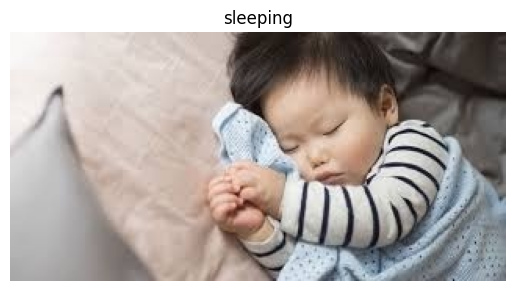

In [8]:
display_random()

In [9]:
image_data = []
image_label = []

for i in (range(len(train_fol)-1)):
    t = '../input/human-action-recognition-har-dataset/Human Action Recognition/train/' + image[i]
    imgg = Image.open(t)
    image_data.append(np.asarray(imgg.resize((160,160))))
    image_label.append(labels[i])

In [10]:
x_train = image_data
x_train = np.asarray(x_train)
type(x_train)

numpy.ndarray

In [11]:
y_train = to_categorical(np.asarray(train_data["label"].factorize()[0]))
print(y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
model = Sequential()

vgg_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(160,160,3),
                   pooling='avg',classes=15,
                   weights='imagenet')

# set layers to non trainable
for layer in vgg_model.layers:
        layer.trainable=False

model.add(vgg_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(15, activation='softmax'))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
history_vgg16 = model.fit(x_train,y_train, epochs=20)

Epoch 1/20
  3/394 ━━━━━━━━━━━━━━━━━━━━ 23s 61ms/step - accuracy: 0.0938 - loss: 6.3081

I0000 00:00:1724326015.829689      75 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1724326015.854261      75 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


394/394 ━━━━━━━━━━━━━━━━━━━━ 58s 98ms/step - accuracy: 0.3752 - loss: 2.3678
Epoch 2/20
  1/394 ━━━━━━━━━━━━━━━━━━━━ 37s 94ms/step - accuracy: 0.5000 - loss: 1.3848

W0000 00:00:1724326054.469409      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


394/394 ━━━━━━━━━━━━━━━━━━━━ 25s 62ms/step - accuracy: 0.5895 - loss: 1.2560
Epoch 3/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - accuracy: 0.6745 - loss: 0.9881
Epoch 4/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.7415 - loss: 0.7753
Epoch 5/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 25s 65ms/step - accuracy: 0.8134 - loss: 0.5765
Epoch 6/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - accuracy: 0.8588 - loss: 0.4353
Epoch 7/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.9015 - loss: 0.3103
Epoch 8/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - accuracy: 0.9246 - loss: 0.2441
Epoch 9/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - accuracy: 0.9309 - loss: 0.2099
Epoch 10/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - accuracy: 0.9457 - loss: 0.1649
Epoch 11/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - accuracy: 0.9495 - loss: 0.1534
Epoch 12/20
394/394 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.9489 - loss: 0.1522
Epoch 13/20
394/394 ━━━━━━━━━━━━━━━━━━━━

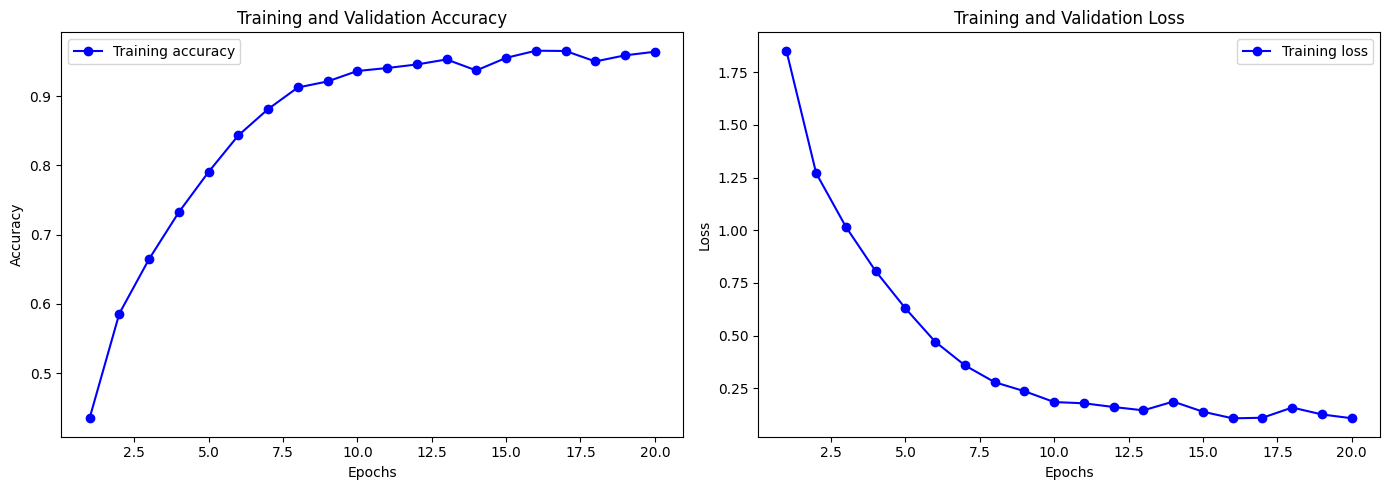

In [14]:
# Extract accuracy and loss values
accuracy = history_vgg16.history['accuracy']
loss = history_vgg16.history['loss']
val_accuracy = history_vgg16.history.get('val_accuracy')
val_loss = history_vgg16.history.get('val_loss')

# Create epochs range
epochs = range(1, len(accuracy) + 1)

# Plot accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo-', label='Training accuracy')
if val_accuracy:
    plt.plot(epochs, val_accuracy, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training loss')
if val_loss:
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
# predictions
def read_img(fn):
    img = Image.open(fn)
    return np.asarray(img.resize((160,160)))

In [16]:
def test_predict(test_image):
    result = model.predict(np.asarray([read_img(test_image)]))

    itemindex = np.where(result==np.max(result))
    prediction = itemindex[1][0]
#     print("label: ", classes[prediction])
    print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", prediction)

    image = img.imread(test_image)
    plt.imshow(image)
    plt.title(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
probability: 99.99814033508301%
Predicted class :  5


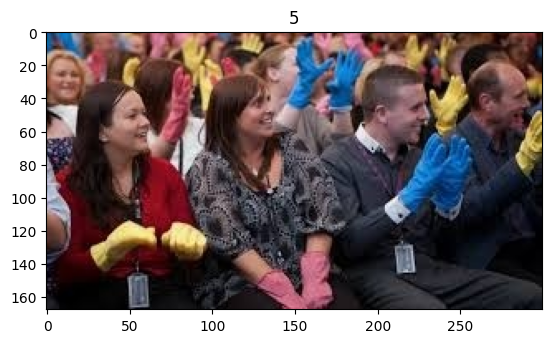

In [17]:
test_predict("/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test/Image_6.jpg")